# Tales of Tails: Analyzing Dog Ratings on Twitter
#### Prepared by: Jose Carlos Moreno Ramirez
#### Institution: Western Govornors University
#### Course: Data Wrangling - D309 
#### Project: Wrangle and Analyze Data
---

## Introduction
Data wrangling, an essential step in data analysis, involves gathering, assessing, and cleaning data to make it suitable for analysis. In this project, we will use Python and its libraries to perform data wrangling on the tweet archive of the Twitter user @dog_rates, popularly known as WeRateDogs. WeRateDogs humorously rates people's dogs, with a typical rating format of numerators greater than 10 and a denominator of 10. This account has gained widespread popularity with over 4 million followers and international media coverage.

---
### The Objective:
The primary objective of this project is to wrangle data from the Twitter account named WeRateDogs using Python and comprehensively document the process in a Jupyter Notebook named **wrangle_act.ipynb**. The goal is to prepare the data for meaningful and reliable analyses, including visualizations.

---
### The Details:
Data wrangling consists of three main phases: Gathering data --> assessing (analyzing) data --> cleaning data. In this project, we focused on assessing and cleaning a subset of the dataset, **addressing a minimum of eight quality issues and two tidiness issues**. The tasks includ:

1. **Data Wrangling**:
   - Gathering data from various sources, including the WeRateDogs Twitter archive, image predictions, and additional data via the Twitter API.
    - Assessing the data for quality and tidiness issues.
    - Cleaning the identified issues to create a high-quality and tidy master DataFrame, which may involve merging data and addressing unique data challenges.
    
2. **Storing --> Analyzing --> Visualizing Data**:
    - Storing the cleaned data in a CSV file named **twitter_archive_master.csv**.
      - Optionally, storing the cleaned data in a SQLite database.
    - Analyzing and visualizing the wrangled data to derive insights and create at least one visualization.


3. **Reporting**:
    - Creating an internal report named **wrangle_report.pdf** or **wrangle_report.html**, summarizing the data wrangling efforts, issues addressed, and decisions made during cleaning.
    - Creating an external report named **act_report.pdf** or **act_report.html**, with a minimum of 250 words, to communicate insights and showcase visualizations derived from the wrangled data. Think of this report as an external document, similar to a blog post.
    
---    
*Quick Notes*:
- During the data assessment part, make sure at least eight quality issues and two neatness issues are found and recorded.

- All issues that are discovered are fixed.

- The end result is a strong and organized master DataFrame (or DataFrames, if necessary).

- The cleaned information gets stored in a CSV file called **`twitter_archive_master.csv`**.

- At least three insights and one viz are developed using data analysis and visualization.

- The other two notebooks are included in the final project: **`act_report.ipynb`** for external communication and **`wrangle_report.ipynb`** for internal use.

In [3]:
#  1. First things first, say it with me now, "importing libraries"!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib.request import urlretrieve
import tweepy
from tweepy import OAuthHandler #imports the error module
import json
import os
import webbrowser
import time
import re

---
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#  1. Checking if the Twitter file doesn't already exist in our envir.
if not os.path.exists('twitter_archive_enhanced.csv'): 
    try:
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
        urlretrieve(url, 'twitter_archive_enhanced.csv')
        # Say good job to the user ( Soft skill = Good Customer Service )
        print("Good job! You didn't manage to break this code LOL: Your file has saved successfully.")
    except OSError as e:
        # If error --> print error message
        print(e)

#  2. Creating Twitter DF
df_archive = pd.read_csv('twitter_archive_enhanced.csv')

#  3. Revising
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#  1. Let's get more data, but this time for image predictions
if not os.path.exists("image_predictions.tsv"):
    try:
        url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
        # get request --> url
        page = requests.get(url)
        print('Your past self would be impressed: Connection Established')
        
        # binary write mode ('wb')
        with open('image_predictions.tsv', 'wb') as file:
            file.write(page.content)
            print('The bag is secured: Your file saved successfully.')
    except OSError as e:
        print(e)

#  2. Creating image DF
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

#  3. Revising
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


###### CITING REFERENCE: 
https://stackoverflow.com/questions/229924/difference-between-files-written-in-binary-and-text-mode

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

###### Quick Note!
*Remember, this may turn out to be a lot of data fetching. Let's be efficient and prepare a text file that will contain the tweet ID's we're pulling data from. To make it easier on the pipeline, store the ID's in separate lines.*

In [6]:
# 1. Extracting tweet ID's from DF and storing them in this list
tweet_ids = list(df_archive.tweet_id)

# 2. Creating a text file and writing each ID from the DF on separate lines.
file_name = 'tweet_ids.txt'
with open(file_name, 'w') as f:
    for id in tweet_ids:
        f.write(f'{str(id)}\n')

In [7]:
# Elon Musk nerfed this part of the project. Please proceed to the next cell block.
#import tweepy
#import json

# Your Twitter API credentials
#consumer_key = 'OOF I AM NOT FREE ANYMORE'
#consumer_secret = 'OOF I AM NOT FREE ANYMORE'
#access_token = 'OOF I AM NOT FREE ANYMORE'
#access_secret = 'OOF I AM NOT FREE ANYMORE'

## Initialize Tweepy
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)

## Read tweet IDs from the text file
#with open('tweet_ids.txt', 'r') as tweet_id_file:
#    for line in tweet_id_file:
#        tweet_id = line.strip()
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            with open('tweet_json.txt', 'a') as json_file:
#                json.dump(tweet._json, json_file)
#                json_file.write('\n')
#            print(f'Successfully downloaded tweet ID: {tweet_id}')
#        except tweepy.TweepError as e:
#            print(f'Error downloading tweet ID {tweet_id}: {e}')
#print("DO NOT USE THIS CODE LOL")

In [8]:
# Using alternative Twitter data access method as per 'Course Tips' instructions
df_twitter = pd.read_json('tweet_json.txt', lines=True)
df_twitter.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
107,2017-06-04 23:56:03+00:00,871515927908634625,871515927908634624,This is Napolean. He's a Raggedy East Nicaragu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 871515922741284865, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20730,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2115,2015-11-28 02:00:17+00:00,670421925039075328,670421925039075328,Meet Herb. 12/10 https://t.co/tLRyYvCci3,False,"[0, 40]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670421917862649857, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1415,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1373,2016-02-22 21:59:57+00:00,701889187134500865,701889187134500864,This is Bilbo. He's not emotionally prepared t...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 701889181371465729, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3905,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
# 4. Reading the tweet_json.txt file
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

# 5. Initializing lists
tweet_ids = []
retweet_counts = []
favorite_counts = []

for value in tweets:
    tweet_ids.append(value['id'])
    retweet_counts.append(value['retweet_count'])
    favorite_counts.append(value['favorite_count'])

# 6. Changing `date_created` to a better timestamp
created_at = []
for value in tweets:
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(value['created_at'], '%a %b %d %H:%M:%S +0000 %Y'))
    created_at.append(date)

# 7. Engineering DF
data = {
    'created_at': created_at,
    'tweet_id': tweet_ids,
    'favorite_count': favorite_counts,
    'retweet_count': retweet_counts
}

# 8. Creating the DataFrame
df_tweet = pd.DataFrame(data)

# 9. Reviewing
print("This looks good :D")
df_tweet.head(3)

This looks good :D


,created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,39467,8853
1,2017-08-01 00:17:27,892177421306343426,33819,6514
2,2017-07-31 00:18:03,891815181378084864,25461,4328


---
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
# Didn't have these packages installed, so installing here
!pip install tabulate

In [11]:
import pandas as pd
from tabulate import tabulate

#  1. We're going to look at a lot of changing data so let's automate with functions
def show_dataframe_info(df, name):
    separador = "=" * 25
    print(f"\n{separador}")
    print(f" DataFrame: {name}")
    print(f"{separador}\n")
        
    # Displays Headers
    print(f"{' 📋 Headers':<20}")
    print(tabulate(df.head(), headers='keys', tablefmt='rst'))
    print("\n...and more data...and more data.")
    
    # Displays Info
    print(f"\n{' Informacion':<20}")
    print(tabulate(pd.DataFrame(df.dtypes, columns=['Data Type']), headers='keys', tablefmt='fancy_grid'))
    print("\n...and more data...and more data.")

    # Displays Summary Statistics
    print(f"\n{' 📊 Summary Statistics':<20}")
    print(tabulate(df.describe().transpose(), headers='keys', tablefmt='fancy_grid'))
    print(f"\n{separador}\n")
    print("\n...and more data...and more data.")

# 2. Analyzing
show_dataframe_info(df_archive, "df_archive")
show_dataframe_info(df_image, "df_image")
show_dataframe_info(df_tweet, "df_tweet")


 DataFrame: df_archive

 📋 Headers          
====  ==================  =======================  =====================  =========================  ==================================================================================  ==================================================================================================================================================================  =====================  ==========================  ============================  ===============================================================================================================================  ==================  ====================  ========  =======  =========  ========  =======
  ..            tweet_id    in_reply_to_status_id    in_reply_to_user_id  timestamp                  source                                                                              text                                                                                                                    

In [12]:
#  3. Combining all columns from all DFs
all_combined_columns = pd.Series(list(df_archive.columns) + list(df_image.columns) + list(df_tweet.columns))

#  4. Identifying all non-unique column names
all_duplicated_columns = all_combined_columns[all_combined_columns.duplicated()]

#  5. Visual time!
print("These are the current duplicated columns:")
print(all_duplicated_columns.tolist())
print("\nThese are the current combined columns:")
print(all_combined_columns.tolist())

These are the current duplicated columns:
['tweet_id', 'tweet_id']

These are the current combined columns:
['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'tweet_id', 'favorite_count', 'retweet_count']


In [13]:
#  6. Creating another function to calculate the total number of missing values in a DF only
def total_missing_values(df):
    return df.isnull().sum().sum()

# Calculating
missing_archive = total_missing_values(df_archive)
missing_image = total_missing_values(df_image)
missing_tweet = total_missing_values(df_tweet)

print(f"Total missing values in df_archive: {missing_archive}")
print(f"Total missing values in df_image: {missing_image}")
print(f"Total missing values in df_tweet: {missing_tweet}")

Total missing values in df_archive: 11140
Total missing values in df_image: 0
Total missing values in df_tweet: 0


In [14]:
# 7. Creating another function to display organized DF stats only
def show_dataframe_stats(df, name):
    separador = "=" * 25
    print(f"\n{separador}")
    print(f" DataFrame: {name}")
    print(f"{separador}\n")

    print(f"{' 📊 Description':<20}")
    print(tabulate(df.describe().transpose(), headers='keys', tablefmt='fancy_grid'))
    print(f"\n{separador}\n")

show_dataframe_stats(df_archive, "df_archive")
show_dataframe_stats(df_image, "df_image")
show_dataframe_stats(df_tweet, "df_tweet")


 DataFrame: df_archive

 📊 Description      
╒══════════════════════════╤═════════╤══════════════╤══════════════╤══════════════════╤══════════════╤══════════════╤══════════════╤════════════════╕
│                          │   count │         mean │          std │              min │          25% │          50% │          75% │            max │
╞══════════════════════════╪═════════╪══════════════╪══════════════╪══════════════════╪══════════════╪══════════════╪══════════════╪════════════════╡
│ tweet_id                 │    2356 │  7.42772e+17 │  6.8567e+16  │      6.66021e+17 │  6.78399e+17 │  7.19628e+17 │  7.99337e+17 │    8.92421e+17 │
├──────────────────────────┼─────────┼──────────────┼──────────────┼──────────────────┼──────────────┼──────────────┼──────────────┼────────────────┤
│ in_reply_to_status_id    │      78 │  7.45508e+17 │  7.58249e+16 │      6.65815e+17 │  6.75742e+17 │  7.03871e+17 │  8.2578e+17  │    8.86266e+17 │
├──────────────────────────┼─────────┼──────────────┼─

In [15]:
#  8. Locating unique values in 'in_reply_to_status_id' within the df_archive.
df_archive['in_reply_to_status_id'].unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [16]:
#  9. Locating unique values in 'in_reply_to_status_id' within df_archive.
df_archive['in_reply_to_user_id'].unique()

array([           nan, 2.28118160e+09, 4.73844300e+07, 3.10544075e+09,
       1.64877600e+07, 7.75962000e+07, 4.19698384e+09, 1.80670967e+08,
       2.79280991e+08, 1.94351775e+08, 1.36157220e+07, 2.19550580e+07,
       8.40547864e+17, 2.89413118e+09, 2.62595760e+07, 3.05820820e+07,
       2.06837240e+07, 1.58285381e+09, 1.13211856e+08, 1.18563420e+07,
       2.91859009e+08, 2.91663050e+07, 7.30505014e+17, 1.58464070e+07,
       4.71729748e+09, 3.58972768e+08, 2.31910820e+09, 2.87854860e+07,
       1.19898851e+09, 4.67036706e+08, 1.63746780e+07, 2.14356580e+07])

In [17]:
#  10. Reviewing twitter archive DF again
df_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None
732,781524693396357120,NaN,NaN,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
1308,707297311098011648,NaN,NaN,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707297311...,10,10,Cassie,None,None,None,None


In [18]:
#  11. Counting the duplicate values in the 'tweet_id' and 'doggo' columns from df_archive.
columns_to_check = ['tweet_id', 'doggo']
duplicate_counts = [df_archive[column].duplicated().sum() for column in columns_to_check]

print(duplicate_counts)

[0, 2354]


In [19]:
#  12. Counting each unique value in the 'doggo' column.
print("Doggo Value Counts:")
print(df_archive.doggo.value_counts())

#  13. Counting each unique value in the 'pupper' column.
print("\nPupper Value Counts:")
print(df_archive.pupper.value_counts())

# 14. Accessing element 0
print("\nSource at Index 0:")
print(df_archive.source[0])

Doggo Value Counts:
None     2259
doggo      97
Name: doggo, dtype: int64

Pupper Value Counts:
None      2099
pupper     257
Name: pupper, dtype: int64

Source at Index 0:
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [20]:
# 15. Reviewing image DF again
df_image.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,1,seashore,0.352321,False,promontory,0.131753,False,wreck,0.095597,False


In [21]:
#  16. Analyzing unique values for each of these columns
print("Unique values in p1_dog column:")
print(df_image.p1_dog.unique())

print("\nUnique values in p2_dog column:")
print(df_image.p2_dog.unique())

print("\nUnique values in p3_dog column:")
print(df_image.p3_dog.unique())

Unique values in p1_dog column:
[ True False]

Unique values in p2_dog column:
[ True False]

Unique values in p3_dog column:
[ True False]


------
## Quality Issues 
1. **Archive Table**:
    - Adjust the datatype for certain columns to ensure consistency.
    - Address missing data in the DataFrame.
    - Replace missing values, currently represented as "None," with appropriate null values in the name column.
    - Review and correct expanded URLs that contain multiple URLs.
    - Improve the formatting of the `text` column.
    - Remove retweets from the data.
    - Address HTML tags in the `source` column.

2. **Image Table**:
    - Standardize the capitalization for `P1`, `P2`, and `P3` labels where necessary.
    - Ensure proper formatting for `P1`, `P2`, and `P3` columns within the image table.

3. **Tweet Table**:
    - Extract the date component from the `date_created` column.
    - Consider renaming the `date_created` column to `timestamp` for consistency across datasets.

### Tidiness issues
- Combine multiple DataFrames to ensure that all tweet-related information is in one place for analysis.
- Combine the dog stage information spread across four columns (`doggo`, `floofer`, `pupper`, and `puppo`) into a single stage column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [76]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

### Issue #1: Archive Table


#### Define: Change the datatype for some columns

#### Code

In [23]:
#  1. Changing the datatype of 'timestamp' in archive table
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#  2. Changing the datatype of 'p2_dog' in image table
df_image_clean['p2_dog'] = df_image_clean['p2_dog'].astype(int)

#  3. Changing the datatype of 'date_created' in tweet table
df_tweet_clean['created_at'] = pd.to_datetime(df_tweet_clean['created_at'])

#### Test

In [24]:
#  4. Analyzing
dataframes = [df_archive_clean, df_image_clean, df_tweet_clean]

for i, df in enumerate(dataframes):
    print(f"{'-' * 50}\nDataFrame {i + 1} ({df.columns[0]} - {df.columns[-1]})")
    print(df.dtypes)

--------------------------------------------------
DataFrame 1 (tweet_id - puppo)
tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object
--------------------------------------------------
Dat

### Issue #2: Archive Table

#### Define: Address the issue of missing data in relevant DF.

#### Code

In [25]:
#  1. Earlier we created a function named 'total_missing_values' that identified the df_archive DF has a lot of null data. 
#     Let's drop some of those columns we don't need and fix this
missing_count_per_column = df_archive_clean.isnull().sum()

#   2. Analyzing
print("Count of Missing Values in Each Column of the df_archive_clean DataFrame:")
print(missing_count_per_column)

Count of Missing Values in Each Column of the df_archive_clean DataFrame:
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


In [26]:
#  3. Specifying which columns to drop
columns_to_drop = [
    'in_reply_to_status_id', 
    'in_reply_to_user_id', 
    'retweeted_status_id',
    'retweeted_status_user_id', 
    'retweeted_status_timestamp'
]

#  4. Dropping
df_archive_clean.drop(columns=columns_to_drop, inplace=True)

#  5. Analyzing
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1408,699072405256409088,2016-02-15 03:27:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
1183,718939241951195136,2016-04-09 23:10:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,None,None,None,None
1150,726224900189511680,2016-04-30 01:41:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None


In [27]:
#  6. Switching NaN with None for these columns
columns_to_change = ['pupper', 'doggo', 'floofer', 'puppo']
df_archive_clean[columns_to_change] = df_archive_clean[columns_to_change].fillna('None')

#### Test

In [28]:
#  2. Analyzing
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1767,678396796259975168,2015-12-20 02:09:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",These little fellas have opposite facial expre...,https://twitter.com/dog_rates/status/678396796...,12,10,None,None,None,None,None
2050,671497587707535361,2015-12-01 01:14:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,https://twitter.com/dog_rates/status/671497587...,11,10,Pip,None,None,None,None
686,788070120937619456,2016-10-17 17:32:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None


### Issue #3: Archive Table

#### Define: Replace missing values, which are now displayed as `None` with acceptable null values.

#### Code

In [29]:
#  1. Replacing "None" with None in the "name" column
df_archive_clean['name'].replace('None', None, inplace=True)

#### Test

In [30]:
#  2. Testing
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2265,667534815156183040,2015-11-20 02:47:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None
1936,673956914389192708,2015-12-07 20:07:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
1326,706153300320784384,2016-03-05 16:24:01+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Layla. She's giving you a standing ova...,https://vine.co/v/iXidJXBJ3P9,13,10,Layla,None,None,None,None


### Issue #4: Archive Table

#### Define: `Expanded_urls` column has more than one URL

#### Code

In [31]:
#  1. Extracting the first URL from 'expanded_urls' in archive table
df_archive_clean['expanded_urls'] = df_archive_clean['expanded_urls'].str.extract(r'(https://\S+)', expand=False)

#### Test

In [32]:
#  2. Testing
result = df_archive_clean['expanded_urls'].str.contains(r'https://').all()
print("Do all URLs contain 'https://' ?:", result)

Do all URLs contain 'https://' ?: True


### Issue #5: Image Table

#### Define: Standardize the capitalization for P1, P2, and P3 labels where necessary.

#### Code

In [33]:
#  1. Capitalizing the labels in 'p1', 'p2', and 'p3'
df_image_clean['p1'] = df_image_clean['p1'].str.capitalize()
df_image_clean['p2'] = df_image_clean['p2'].str.capitalize()
df_image_clean['p3'] = df_image_clean['p3'].str.capitalize()

#  2. Testing
assert df_image_clean['p1'].str.islower().sum() == 0
assert df_image_clean['p2'].str.islower().sum() == 0
assert df_image_clean['p3'].str.islower().sum() == 0

#### Test

In [34]:
#  2. Analyzing
columns_to_check = ['p1', 'p2', 'p3']

for column in columns_to_check:
    assert (df_image_clean[column].str.islower().sum() == 0), f"Column {column} contains lowercase strings."

### Issue #6: Image Table

#### Define: Ensure proper formatting for `P1`, `P2`, and `P3` columns within the image table.

#### Code

In [58]:
#  1. Replace "_" with space " " for 'p1', 'p2', and 'p3' in image table
df_image_clean['p1'] = df_image_clean['p1'].str.replace("_", " ")
df_image_clean['p2'] = df_image_clean['p2'].str.replace("_", " ")
df_image_clean['p3'] = df_image_clean['p3'].str.replace("_", " ")

#### Test

In [59]:
#  2. Testing
assert not df_image_clean['p1'].str.contains("_").any()
assert not df_image_clean['p2'].str.contains("_").any()
assert not df_image_clean['p3'].str.contains("_").any()

### Issue #7: Archive Table

#### Define: Improve the formatting of the text column.

#### Code

In [35]:
#  1. Removing any leading/trailing whitespace and then capitalzing the first letter of each word
df_archive_clean['text'] = df_archive_clean['text'].str.strip().str.title()

#### Test

In [36]:
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2131,670086499208155136,2015-11-27 03:47:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hi Yes This Is Dog. I Can'T Help With That S-...",https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
1325,706166467411222528,2016-03-05 17:16:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This Is Dexter. He'S A Shy Pup. Doesn'T Bark M...,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,None,None,None,None
355,830956169170665475,2017-02-13 01:46:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say Hello To Reggie. He Hates Puns. 12/10 Ligh...,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,None,None,None,None


### Issue #8: Archive Table

#### Define: Removing retweets

#### Code

In [37]:
#  1. Removing retweets
df_archive_clean = df_archive_clean[~df_archive_clean['text'].str.startswith("RT @")]

#### Test

In [38]:
#  2. Testing
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2018,672139350159835138,2015-12-02 19:44:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This Pup Has A Heart On Its Ass And That Is Do...,https://twitter.com/dog_rates/status/672139350...,12,10,None,None,None,None,None
230,847978865427394560,2017-04-01 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Rt @Dog_Rates: This Is Charlie. He Fell Asleep...,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
173,858471635011153920,2017-04-30 00:02:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This Is Sophie. She Just Arrived. Used Paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,None,None,None,None


### Issue #9: Archive Table

#### Define: Adressing HTML tags

#### Code

In [39]:
from bs4 import BeautifulSoup

#  1. Creating function that removes HTML tags and extracts text
def clean_source(source):
    soup = BeautifulSoup(source, 'html.parser')
    return soup.get_text()

#  2. Applying to the 'source' column
df_archive_clean['source'] = df_archive_clean['source'].apply(clean_source)

#### Test

In [40]:
#  2. Testing
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
592,798933969379225600,2016-11-16 17:01:16+00:00,Twitter for iPhone,This Is Iroh. He'S In A Predicament. 12/10 Som...,https://twitter.com/dog_rates/status/798933969...,12,10,Iroh,None,None,None,None
649,792913359805018113,2016-10-31 02:17:31+00:00,Twitter for iPhone,Here Is A Perfect Example Of Someone Who Has T...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
992,748692773788876800,2016-07-01 01:40:41+00:00,Twitter for iPhone,That Is Quizno. This Is His Beach. He Does Not...,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,None,None,None


###### CITING REFERENCE: 
Web Scraping with Python - Beautful Soup Crash Course - https://www.youtube.com/watch?v=XVv6mJpFOb0

### Issue #10: Tweet Table

#### Define: Extract the date component from the `date_created` column.

#### Code

In [41]:
#  1. Extracting the date component from 'date_created' in tweet table
df_tweet_clean['Timestamp'] = pd.to_datetime(df_tweet_clean['created_at']).dt.date

#### Test

In [42]:
#  2. Testing
assert df_tweet_clean['Timestamp'].dtype == 'object'

### Issue #11: Tweet Table

#### Define: Consider renaming the `created_at` column to `timestamp` for consistency across datasets.

#### Code

In [43]:
# Renaming the 'date_created' column to 'timestamp' in tweet table
df_tweet_clean.rename(columns={"created_at": "timestamp"}, inplace=True)

#### Test

In [44]:
#  2. Testing
assert 'timestamp' in df_tweet_clean.columns

### Tidiness Issue 1: All Tables

#### Define: Data related to tweets is divided and stored in 3 different DataFrames - combine into one master DataFrame.

#### Code

In [68]:
# (df_archive_clean) contains info about tweets from the WeRateDogs Twitter account
# (df_image_clean) contains info about the images associated with those tweets
# (df_tweet_clean) contains additional tweet-related data

#  1. Combining all relevant info about tweets into a single master DataFrame
master_df = df_archive_clean.merge(df_image_clean, on="tweet_id").merge(df_tweet_clean, on="tweet_id")
master_df.head()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count,Timestamp
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This Is Phineas. He'S A Mystical Boy. Only Eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,Bagel,0.085851,0,Banana,0.076110,False,2017-08-01 16:23:56,39467,8853,2017-08-01
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This Is Tilly. She'S Just Checking Pup On You....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,1,Papillon,0.068957,True,2017-08-01 00:17:27,33819,6514,2017-08-01
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This Is Archie. He Is A Rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Malamute,0.078253,1,Kelpie,0.031379,True,2017-07-31 00:18:03,25461,4328,2017-07-31
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This Is Darla. She Commenced A Snooze Mid Meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Labrador retriever,0.168086,1,Spatula,0.040836,False,2017-07-30 15:58:51,42908,8964,2017-07-30
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This Is Franklin. He Would Like You To Stop Ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English springer,0.225770,1,German short-haired pointer,0.175219,True,2017-07-29 16:00:24,41048,9774,2017-07-29


In [69]:
#  2. Dropping 'timestamp_y' and renaming 'timestamp_x' to 'timestamp' for continuity
master_df.drop(columns=['timestamp_y'], inplace=True)
master_df.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

#  3. Extracting the 'month' and 'day' from 'timestamp'
master_df['month'] = master_df['timestamp'].dt.month_name()
master_df['day'] = master_df['timestamp'].dt.day_name()

#### Test

In [70]:
#  2. Testing
master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,Timestamp,month,day
1238,694001791655137281,2016-02-01 03:38:15+00:00,Twitter for iPhone,This Is Chester. He'S A Benefloof Cumberbark. ...,https://twitter.com/dog_rates/status/694001791...,11,10,Chester,unknown,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,...,0.229228,1,Chihuahua,0.000247,True,3705,1176,2016-02-01,February,Monday
980,719551379208073216,2016-04-11 15:43:12+00:00,Twitter for iPhone,This Is Harnold. He Accidentally Opened The Fr...,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,unknown,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,...,0.076435,1,Eskimo dog,0.035745,True,5515,2192,2016-04-11,April,Monday
1314,688789766343622656,2016-01-17 18:27:32+00:00,Twitter for iPhone,Meet Pubert. He'S A Kerplunk Rumplestilt. Cann...,https://twitter.com/dog_rates/status/688789766...,8,10,Pubert,unknown,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,...,0.380976,1,Bull mastiff,0.003889,True,2434,759,2016-01-17,January,Sunday
1101,706593038911545345,2016-03-06 21:31:22+00:00,Twitter for iPhone,Here'S A Sneak Peek Of Me On Spring Break. 10/...,https://twitter.com/dog_rates/status/706593038...,10,10,None,unknown,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,...,0.189312,0,Pillow,0.029409,False,2363,718,2016-03-06,March,Sunday
776,752173152931807232,2016-07-10 16:10:29+00:00,Twitter for iPhone,This Is Brody. He'S A Lifeguard. Always Prepar...,https://twitter.com/dog_rates/status/752173152...,12,10,Brody,unknown,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,...,0.174765,1,Chihuahua,0.045525,True,6569,2106,2016-07-10,July,Sunday


### Tidiness Issue 2: Image table

#### Define: Combining dog stage columns

#### Code

In [77]:
#  1. Replacing 'None' with empty string in each dog stage column
df_archive_clean['doggo'].replace('None', '', inplace=True)
df_archive_clean['floofer'].replace('None', '', inplace=True)
df_archive_clean['pupper'].replace('None', '', inplace=True)
df_archive_clean['puppo'].replace('None', '', inplace=True)

#  2. Combining into one 'stage' column
df_archive_clean['stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

#  3. Double checking
print(df_archive_clean['stage'].unique())

['' 'doggo' 'puppo' 'pupper' 'floofer' 'doggopuppo' 'doggofloofer'
 'doggopupper']


In [78]:
#  4. Replace empty column with 'unknown' label
df_archive_clean['stage'].replace('', 'unknown', inplace=True)

#  5. Double checking
print(df_archive_clean['stage'].unique())

['unknown' 'doggo' 'puppo' 'pupper' 'floofer' 'doggopuppo' 'doggofloofer'
 'doggopupper']


In [79]:
#  6. Dropping the older stage columns
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [80]:
#  2. Testing
df_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,unknown
1917,674291837063053312,NaN,NaN,2015-12-08 18:17:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenny. He just wants to be included in...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,unknown
1804,676946864479084545,NaN,NaN,2015-12-16 02:08:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676946864...,12,10,None,unknown


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
#  1. Saving the modified master DF to a CSV file
master_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
#  1. Seeing what we're working with
master_df.sample(5)

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count,Timestamp
1883,669375718304980992,2015-11-25 04:43:02+00:00,Twitter for iPhone,This Is Billl. He'S Trying To Be A Ghost But H...,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,unknown,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,...,Norfolk_terrier,0.107479,1,Lakeland_terrier,0.097846,True,2015-11-25 04:43:02,1425,792,2015-11-25
912,734776360183431168,2016-05-23 16:01:50+00:00,Twitter for iPhone,This Is Livvie. Someone Should Tell Her It'S B...,https://twitter.com/dog_rates/status/734776360...,11,10,Livvie,unknown,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,...,Eskimo_dog,0.155147,1,Malamute,0.050942,True,2016-05-23 16:01:50,2742,608,2016-05-23
1663,673715861853720576,2015-12-07 04:09:13+00:00,Twitter for iPhone,This Is A Heavily Opinionated Dog. Loves Walls...,https://twitter.com/dog_rates/status/673715861...,4,10,a,unknown,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,...,Bow_tie,0.294683,0,Windsor_tie,0.132701,False,2015-12-07 04:09:13,3815,2303,2015-12-07
1595,675166823650848770,2015-12-11 04:14:49+00:00,Twitter for iPhone,This Is Arnold. He Broke His Leg Saving A Hand...,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,unknown,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,...,Standard_poodle,0.132569,1,Teddy,0.127975,False,2015-12-11 04:14:49,3920,1795,2015-12-11
815,748575535303884801,2016-06-30 17:54:50+00:00,Twitter for iPhone,This Is One Of The Most Reckless Puppers I'Ve ...,https://twitter.com/dog_rates/status/748575535...,6,10,one,unknown,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,...,Seat_belt,0.160953,0,Soft-coated_wheaten_terrier,0.086499,True,2016-06-30 17:54:50,6696,2272,2016-06-30


### Insights:
1. What are the Most Popular Dog Breeds?

2. What is the distribution of tweet sources?

3. Is There a Correlation Between Retweet Counts and Favorite Counts?

4. Which Months of the Year Have the Most Retweets for the year 2016?

5. What is the Distribution of Dog Stages?

Bonus Question: Which Months of the Year Have the Most Retweets for the Years 2015 - 2017?

### Visualization

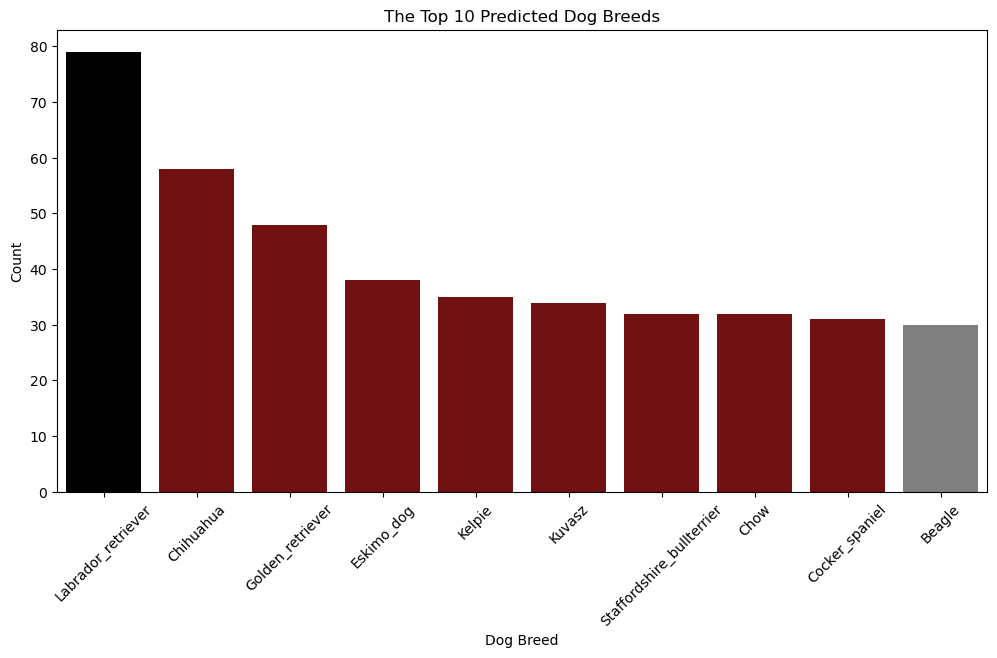


    OBSERVATIONS
    Chart 1/5 - The Top 10 Predicted Dog Breeds
    
    In this bar chart:
    ------------------
    1. Labarador Retrievers are the most popular dog breed.
    2. Beagles made it in the top 10 list.
    3. In a surprise, coming in at number 2, Chihuahua's are more popular than Golden Retrievers.
    


In [62]:
#  1. Grouping the master_df by dog breed and counting the occurrences
breed_counts = master_df['p3'].value_counts().nlargest(10)

#  2. Statistics
highest_count = breed_counts.max()
lowest_count = breed_counts.min()

#  3. Adding color
colors = ['black' if count == highest_count else 'grey' if count == lowest_count else 'maroon' for count in breed_counts]

#  4. Visual time!
plt.figure(figsize=(12, 6))
sns.barplot(x=breed_counts.index, y=breed_counts.values, palette=colors)
plt.title('The Top 10 Predicted Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print('''
    OBSERVATIONS
    ============
    Chart 1/5 - The Top 10 Predicted Dog Breeds
    
    In this bar chart:
    ------------------
    1. Labarador Retrievers are the most popular dog breed.
    2. Beagles made it in the top 10 list.
    3. In a surprise, coming in at number 2, Chihuahua's are more popular than Golden Retrievers.
    ''')

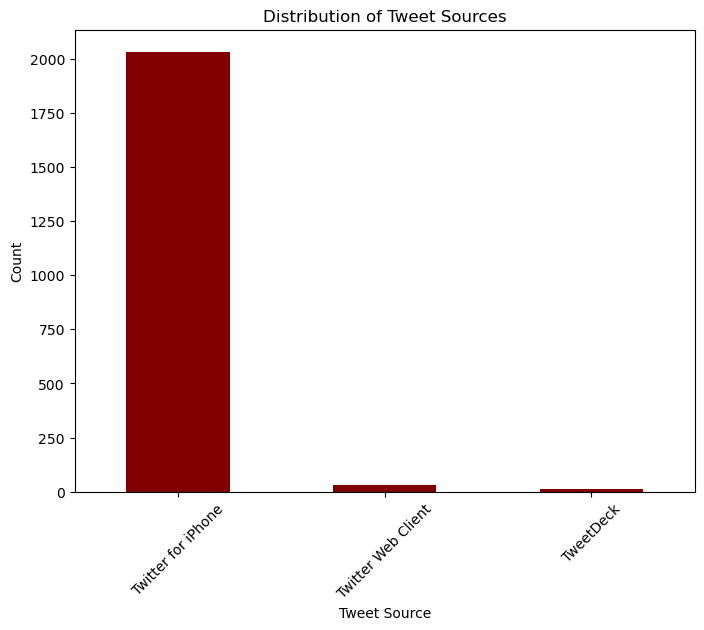


    OBSERVATIONS
    Chart 2/5 - Distribution of Tweet Sources
    
    In this bar chart:
    ------------------
    1. Twitter for iPhone is the most common source for tweets in the dataset.
    2. Twitter Web Client and TweetDeck are also used but to a much lesser extent.
    3. There's a significant difference in tweet sources.
    


In [63]:
#  1. Counting the number of tweets from each source
source_counts = master_df['source'].value_counts()

#  2. Visual time!
plt.figure(figsize=(8, 6))
source_counts.plot(kind='bar', color='maroon')
plt.title('Distribution of Tweet Sources')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print('''
    OBSERVATIONS
    ============
    Chart 2/5 - Distribution of Tweet Sources
    
    In this bar chart:
    ------------------
    1. Twitter for iPhone is the most common source for tweets in the dataset.
    2. Twitter Web Client and TweetDeck are also used but to a much lesser extent.
    3. There's a significant difference in tweet sources.
    ''')

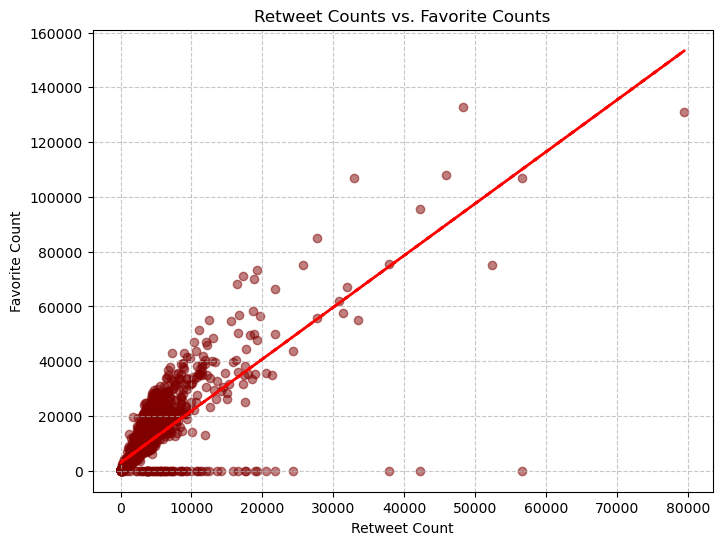


    OBSERVATIONS
    Chart 3/5 - Retweet Counts vs. Favorite Counts
    
    In this scatter plot:
    -----------------------
    1. There is a positive correlation between retweet counts and favorite counts.
    2. Tweets with more favorites tend to have more retweets.
    


In [64]:
#  1. Adding a linear regression line
coefficients = np.polyfit(master_df['retweet_count'], master_df['favorite_count'], 1)
line = np.poly1d(coefficients)

#  2. Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(master_df['retweet_count'], master_df['favorite_count'], color='maroon', alpha=0.5)
plt.title('Retweet Counts vs. Favorite Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.grid(linestyle='--', alpha=0.7)

#  3. Adding the trend line to the plot
plt.plot(master_df['retweet_count'], line(master_df['retweet_count']), color='red', linestyle='--', linewidth=2)


#  4. Visual time!
plt.show()

print('''
    OBSERVATIONS
    ============
    Chart 3/5 - Retweet Counts vs. Favorite Counts
    
    In this scatter plot:
    -----------------------
    1. There is a positive correlation between retweet counts and favorite counts.
    2. Tweets with more favorites tend to have more retweets.
    ''')


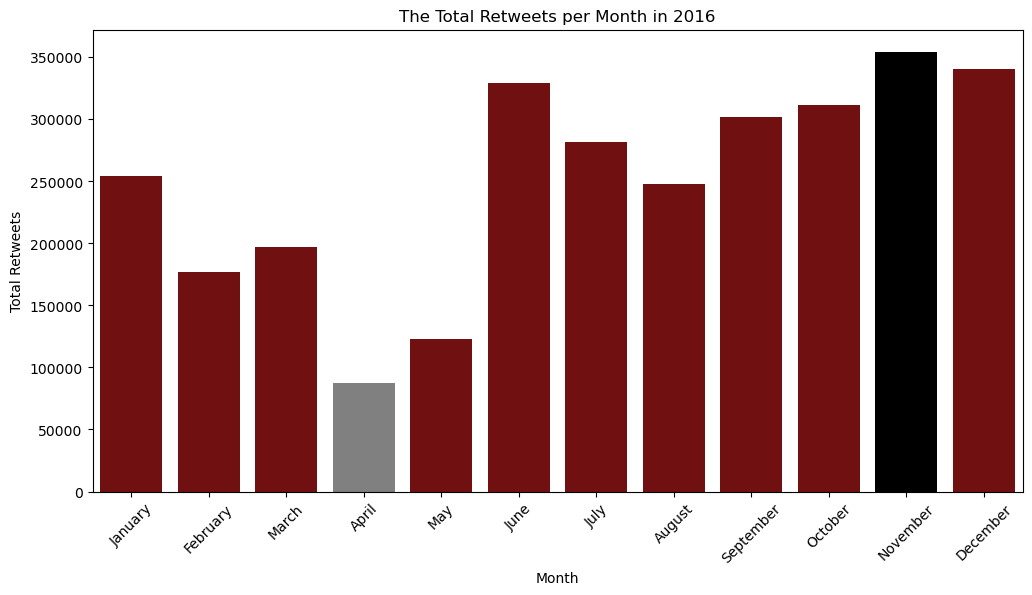


    OBSERVATIONS
    Chart 4/5 - Total Retweets per Month in 2016
    
    In this bar chart:
    ------------------
    1. November has the highest total retweets.
    2. April has the lowest total retweets.
    3. The data shows variations in retweet counts across different months in 2016.
    


In [81]:
#  1. Extracting the year from the timestamp
master_df['year'] = master_df['timestamp'].dt.year

#  2. Filtering by year
target_year = 2016
tweets_in_year = master_df[master_df['year'] == target_year]

#  3. Grouping the data by month and then calculating the total retweets per each month
retweets_per_month = tweets_in_year.groupby(tweets_in_year['timestamp'].dt.strftime('%B'))['retweet_count'].sum()

#  4. Sorting months
retweets_per_month = retweets_per_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#  5. Applying colors
colors = ['black' if month == retweets_per_month.idxmax() else 'grey' if month == retweets_per_month.idxmin() else 'maroon' for month in retweets_per_month.index]

#  6. Visual time!
plt.figure(figsize=(12, 6))
sns.barplot(x=retweets_per_month.index, y=retweets_per_month.values, palette=colors)
plt.title(f'The Total Retweets per Month in {target_year}')
plt.xlabel('Month')
plt.ylabel('Total Retweets')
plt.xticks(rotation=45)
plt.show()

print('''
    OBSERVATIONS
    ============
    Chart 4/5 - Total Retweets per Month in 2016
    
    In this bar chart:
    ------------------
    1. November has the highest total retweets.
    2. April has the lowest total retweets.
    3. The data shows variations in retweet counts across different months in 2016.
    ''')

In [ ]:
# 1. Grouping the data by 'stage' and counting the occurrences
stage_counts = df_archive_clean['stage'].value_counts()

# 2. Adding colors
colors = ['black' if stage == stage_counts.idxmax() else 'grey' if stage == stage_counts.idxmin() else 'maroon' for stage in stage_counts.index]

# 3. Visual time!
plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette=colors)
plt.title('The Distribution of Dog Stages')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print('''
    OBSERVATIONS
    ============
    Chart 5/5 - The Distribution of Dog Stages
    
    In this bar chart:
    ------------------
    1. Surprisingly, the 'unknown' stages represent cases where Twitter users did not specify a dog stage in their tweets.
    2. The combinations of dog stages represent cases where Twitter users assigned multiple stage labels to their dogs.
    ''')

**Quick note!**
> I played around with the `target_year` variable and noticed that this entire dataset began collecting data from sometime around November 2015 through August 2017. 

> So, in the spirit of data exploration I decided to see what the visuals display if I **combined all the data accumulated over the life of this API** in a bonus chart!

In [ ]:
#  1. Extracting the year from the timestamp column
master_df['year'] = master_df['timestamp'].dt.year

#  2. Filtering by years 2015, 2016, and 2017
years_of_interest = [2015, 2016, 2017]
tweets_in_years = master_df[master_df['year'].isin(years_of_interest)]

#  3. Grouping the data by month and calculating the total retweets per each month
retweets_per_month = tweets_in_years.groupby(tweets_in_years['timestamp'].dt.strftime('%B'))['retweet_count'].sum()

#  4. Sorting months
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
retweets_per_month = retweets_per_month.reindex(months_in_order)

#  5. Applying colors
colors = ['black' if month == retweets_per_month.idxmax() else 'grey' if month == retweets_per_month.idxmin() else 'maroon' for month in retweets_per_month.index]

#  7. Visual time!
plt.figure(figsize=(12, 6))
sns.barplot(x=retweets_per_month.index, y=retweets_per_month.values, palette=colors)
plt.title('The Total Retweets per Month (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Total Retweets')
plt.xticks(rotation=45)
plt.show()

print('''
    OBSERVATIONS
    ============
    Bonus chart - Total Retweets per Month (2015 - 2017)
    
    In this bar chart:
    ------------------
    1. Most Twitter users seem to adore their furry friends the most in the month of December.
    2. August has the lowest total retweets. Back to school-itis, maybe?
    3. Looking at more data over time, we can observe that there is a fluctuation of dog sentiment with no clear trend.
    ''')

---
END OF NOTEBOOK